Mix labels of several trained models:

* Baseline Ada
* LibRu Ada
* BigDataset Ada
* SensGram wiki+contexts

In [1]:
import numpy as np
import pandas as pd

In [3]:
from testing_interface import make_data,\
                              visualize_pca,\
                              evaluate_weighted_ari,\
                              get_one_word_data,\
                              visualize_pca_one_word,\
                              visualize_tsne_one_word

DATASET = '../data/main/wiki-wiki/train.csv'

contexts, main_words, labels, word_list_uniq = make_data(df_file_name=DATASET,\
                 use_gensim_simple_preproc=False, use_mystem=True,\
                 throw_main_word=False, tokenize=True)

<img src="pics/table.jpg">

# Simple Rule {MAX}:

take labels with max number of clusters

In [19]:
from os.path import join

In [2]:
ls -lh ../data/main/wiki-wiki/

total 4,0M
-rw-r--r-- 1 fogside fogside 515K дек 20 11:53 test.csv
-rw-r--r-- 1 fogside fogside 348K ноя  7 15:48 train.baseline-adagram.csv
-rw-r--r-- 1 fogside fogside 350K ноя 21 16:40 train.constant.csv
-rw-r--r-- 1 fogside fogside 358K янв 13 20:52 train.csv
-rw-r--r-- 1 fogside fogside 361K янв 22 17:08 train.csv_bigText.csv
-rw-r--r-- 1 fogside fogside 361K янв 22 17:01 train.csv_libru.csv
-rw-r--r-- 1 fogside fogside 364K янв 22 17:25 train.csv_sensegram.csv
-rw-r--r-- 1 fogside fogside 350K ноя 21 16:40 train.oracle.csv
-rw-r--r-- 1 fogside fogside 350K ноя 21 16:40 train.random-1-3.csv
-rw-r--r-- 1 fogside fogside 350K ноя 21 16:40 train.random-1-6.csv
-rw-r--r-- 1 fogside fogside 350K ноя 21 16:40 train.unique-dataset-wise.csv


In [304]:
def check_dataset(dataset_folder):
    DATASET = join(dataset_folder+'train.csv')
    
    
    contexts, main_words, labels, word_list_uniq = make_data(df_file_name=DATASET,\
                     use_gensim_simple_preproc=False, use_mystem=True,\
                     throw_main_word=False, tokenize=True)
    
    libru = pd.read_csv(join(dataset_folder, "train.csv_libru.csv"))
    bigText = pd.read_csv(join(dataset_folder,"train.csv_bigText.csv"))
    baseline = pd.read_csv(join(dataset_folder,"train.baseline-adagram.csv"), sep='\t')
    sensegram = pd.read_csv(join(dataset_folder,"train.csv_sensegram.csv"))
    
    datasets = [libru, bigText, baseline, sensegram]
    
    prediction = []

    for w in word_list_uniq:
        clust_num = []
        for df in datasets:
            n = len(set(df[df.word == w].predict_sense_id.values))
            clust_num.append(n)
        chosen = np.argmax(clust_num)
        print("For word {} chosen {}".format(w, chosen))
        d = datasets[chosen] # датасет,из которого берем предсказания
        prediction.extend(d[d.word == w].predict_sense_id)
    print('-'*10)
    print(len(prediction))
    evaluate_weighted_ari(DATASET, prediction)

In [63]:
check_dataset("../data/main/wiki-wiki/")

For word замок chosen 0
For word лук chosen 2
For word суда chosen 2
For word бор chosen 2
----------
439
word	ari	count
бор	0.591175	56
замок	0.337541	138
лук	0.637076	110
суда	0.005465	135
	0.342831	439


In [64]:
check_dataset("../data/main/bts-rnc/")

For word балка chosen 0
For word вид chosen 0
For word винт chosen 0
For word горн chosen 2
For word губа chosen 2
For word жаба chosen 0
For word клетка chosen 2
For word крыло chosen 0
For word купюра chosen 0
For word курица chosen 2
For word лавка chosen 2
For word лайка chosen 2
For word лев chosen 2
For word лира chosen 0
For word мина chosen 2
For word мишень chosen 2
For word обед chosen 2
For word оклад chosen 0
For word опушка chosen 2
For word полис chosen 2
For word пост chosen 0
For word поток chosen 2
For word проказа chosen 0
For word пропасть chosen 2
For word проспект chosen 0
For word пытка chosen 2
For word рысь chosen 2
For word среда chosen 2
For word хвост chosen 0
For word штамп chosen 0
----------
3491
word	ari	count
балка	0.559585	119
вид	0.103725	77
винт	0.458525	123
горн	0.148054	51
губа	0.011532	137
жаба	-0.053646	121
клетка	0.253548	150
крыло	0.251726	91
купюра	-0.026889	150
курица	0.303684	93
лавка	0.275710	149
лайка	-0.028626	99
лев	0.227088	44
лира	0.459

In [65]:
check_dataset("../data/main/active-dict/")

For word дар chosen 2
For word двигатель chosen 0
For word двойник chosen 0
For word дворец chosen 0
For word девятка chosen 3
For word дедушка chosen 2
For word дежурная chosen 2
For word дежурный chosen 2
For word декабрист chosen 0
For word декрет chosen 3
For word дело chosen 2
For word демобилизация chosen 3
For word демократ chosen 0
For word демонстрация chosen 0
For word дерево chosen 2
For word держава chosen 2
For word дерзость chosen 0
For word десятка chosen 2
For word десяток chosen 2
For word деятель chosen 0
For word диалог chosen 0
For word диаметр chosen 2
For word диплом chosen 2
For word директор chosen 2
For word диск chosen 0
For word дичь chosen 2
For word длина chosen 2
For word доброволец chosen 0
For word добыча chosen 0
For word доказательство chosen 2
For word доктор chosen 0
For word долгота chosen 2
For word доля chosen 0
For word дом chosen 2
For word дорога chosen 0
For word достижение chosen 2
For word древесина chosen 2
For word дупло chosen 2
For word 

### Вывод

Итак, улучшились скоры на датасетах 2 и 3, но ухудшился скор на вики.

В целом, улучшения заметные, но скоры все еще не очень высокие.

# Simple Rule {MIN>=2}:

take labels with min number of clusters which >=2

In [55]:
def get_min_bigger2(array):
    mini = 0
    for i, val in enumerate(array):
        if (val>=2) and (val<array[mini]):
            mini = i
    return mini

In [60]:
def check_dataset2(dataset_folder):
    DATASET = join(dataset_folder+'train.csv')
    
    
    contexts, main_words, labels, word_list_uniq = make_data(df_file_name=DATASET,\
                     use_gensim_simple_preproc=False, use_mystem=True,\
                     throw_main_word=False, tokenize=True)
    
    libru = pd.read_csv(join(dataset_folder, "train.csv_libru.csv"))
    bigText = pd.read_csv(join(dataset_folder,"train.csv_bigText.csv"))
    baseline = pd.read_csv(join(dataset_folder,"train.baseline-adagram.csv"), sep='\t')
    sensegram = pd.read_csv(join(dataset_folder,"train.csv_sensegram.csv"))
    
    datasets = [libru, bigText, baseline, sensegram]
    
    prediction = []

    for w in word_list_uniq:
        clust_num = []
        for df in datasets:
            n = len(set(df[df.word == w].predict_sense_id.values))
            clust_num.append(n)
        chosen = get_min_bigger2(clust_num)
        print("For word {} chosen {}".format(w, chosen))
        d = datasets[chosen] # датасет,из которого берем предсказания
        prediction.extend(d[d.word == w].predict_sense_id)
    print('-'*10)
    print(len(prediction))
    prediction = [str(p) for p in prediction]
    evaluate_weighted_ari(DATASET, prediction)

In [61]:
check_dataset2("../data/main/wiki-wiki/")

For word замок chosen 3
For word лук chosen 1
For word суда chosen 0
For word бор chosen 0
----------
439
word	ari	count
бор	0.171375	56
замок	-0.002524	138
лук	0.927898	110
суда	-0.078850	135
	0.229323	439


In [66]:
check_dataset2("../data/main/bts-rnc/")

For word балка chosen 1
For word вид chosen 3
For word винт chosen 3
For word горн chosen 0
For word губа chosen 3
For word жаба chosen 1
For word клетка chosen 1
For word крыло chosen 1
For word купюра chosen 3
For word курица chosen 0
For word лавка chosen 0
For word лайка chosen 0
For word лев chosen 3
For word лира chosen 1
For word мина chosen 3
For word мишень chosen 0
For word обед chosen 0
For word оклад chosen 3
For word опушка chosen 0
For word полис chosen 0
For word пост chosen 3
For word поток chosen 1
For word проказа chosen 2
For word пропасть chosen 0
For word проспект chosen 1
For word пытка chosen 0
For word рысь chosen 0
For word среда chosen 0
For word хвост chosen 3
For word штамп chosen 2
----------
3491
word	ari	count
балка	0.570300	119
вид	-0.007547	77
винт	0.007195	123
горн	-0.013183	51
губа	-0.001137	137
жаба	0.026540	121
клетка	0.670594	150
крыло	0.161214	91
купюра	-0.000079	150
курица	0.000000	93
лавка	0.305352	149
лайка	0.000000	99
лев	0.005695	44
лира	0.76

In [67]:
check_dataset2("../data/main/active-dict/")

For word дар chosen 0
For word двигатель chosen 1
For word двойник chosen 1
For word дворец chosen 3
For word девятка chosen 0
For word дедушка chosen 0
For word дежурная chosen 0
For word дежурный chosen 0
For word декабрист chosen 0
For word декрет chosen 0
For word дело chosen 3
For word демобилизация chosen 0
For word демократ chosen 1
For word демонстрация chosen 1
For word дерево chosen 1
For word держава chosen 0
For word дерзость chosen 1
For word десятка chosen 0
For word десяток chosen 3
For word деятель chosen 1
For word диалог chosen 3
For word диаметр chosen 0
For word диплом chosen 0
For word директор chosen 1
For word диск chosen 1
For word дичь chosen 0
For word длина chosen 3
For word доброволец chosen 0
For word добыча chosen 3
For word доказательство chosen 1
For word доктор chosen 1
For word долгота chosen 0
For word доля chosen 1
For word дом chosen 0
For word дорога chosen 3
For word достижение chosen 3
For word древесина chosen 0
For word дупло chosen 0
For word 

### Вывод

Итак, при такой стратегии стало только хуже или ничего не изменилось

# Pairwise ARI to choose right

In [170]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import homogeneity_score

In [339]:
def create_features(word, dataset_folder, true_labels = None):
    
    libru = pd.read_csv(join(dataset_folder, "train.csv_libru.csv"))
    bigText = pd.read_csv(join(dataset_folder,"train.csv_bigText.csv"))
    baseline = pd.read_csv(join(dataset_folder,"train.baseline-adagram.csv"), sep='\t')
    sensegram = pd.read_csv(join(dataset_folder,"train.csv_sensegram.csv"))

    datasets = [libru, bigText, baseline, sensegram]
    features = list()
    
    all_marks = []
    for dset in datasets:
        all_marks.append(dset[dset.word == word].predict_sense_id.values)
    
    pairwise_mtx = np.zeros((4,4))

    for i, di in enumerate(all_marks):
        tmp = dict()
        for j, dj in enumerate(all_marks):
            if (i!=j):
                tmp["ari{}".format(j)] = adjusted_rand_score(di,dj)
                tmp["homogeneity{}".format(j)] = homogeneity_score(di, dj) # non-symmetry-score
            else:
                tmp["ari{}".format(j)] = adjusted_rand_score(di,dj)
                tmp["homogeneity{}".format(j)] = homogeneity_score(di, dj) # non-symmetry-score
        features.append(tmp)

    for i, ds in enumerate(datasets):
        features[i]["sense_num"] = len(ds[ds.word == word].predict_sense_id.unique())
        
    if true_labels is not None:
        label = np.argmax([adjusted_rand_score(true_labels, lab) for lab in all_marks])
        for i, item in enumerate(features):
            features[i]['true'] = (i == label)
    return features

In [340]:
from typing import List

In [341]:
def make_dataset(dataset_folder_list: List):
    
    absolut_wiki_scores = [0.193393,0.281250,0.392449,0.063380]
    absolut_active_d_scores = [0.159932, 0.079166, 0.164103, 0.006327]
    absolut_bts_scores =  [0.244253, 0.164169, 0.223731, 0.004098]
    dataset = []
    
    for dataset_folder in dataset_folder_list:
        true_ds = pd.read_csv(join(dataset_folder, "train.csv"), sep='\t')
        u_words = true_ds.word.unique()

        for word in u_words:
            true_labels = true_ds[true_ds.word == word].gold_sense_id.values
            dataset.extend(create_features(word, dataset_folder, true_labels))

    df = pd.DataFrame(dataset)
    return df

In [342]:
dataset_list = ["../data/main/wiki-wiki/",
               "../data/main/bts-rnc/",
               "../data/main/active-dict/"]

In [343]:
features = make_dataset(dataset_list)

In [337]:
features.shape

(476, 10)

(array([357.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 119.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

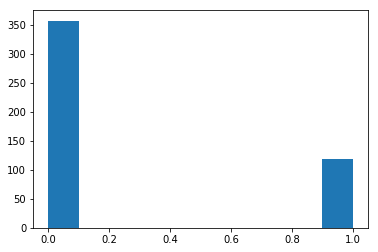

In [345]:
plt.hist(features.true)

In [346]:
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict

In [347]:
X = features.drop(labels="true", axis=1).values
y = features.true.values

In [348]:
xgbSolver = xgboost.XGBClassifier(n_estimators=150, learning_rate=0.05)
lr = LogisticRegression()
nb = GaussianNB()

In [349]:
cross_val_score(estimator=xgbSolver, X=X, y=y)

/home/fogside/virtualenvs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fogside/virtualenvs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fogside/virtualenvs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0.72955975, 0.69811321, 0.73417722])

In [350]:
cross_val_score(estimator=lr, X=X, y=y, scoring='accuracy')

array([0.73584906, 0.74842767, 0.75949367])

In [351]:
cross_val_score(estimator=nb, X=X, y=y, scoring='accuracy')

array([0.6163522 , 0.64779874, 0.68987342])

In [352]:
predictions = cross_val_predict(nb, X, y, cv=2)

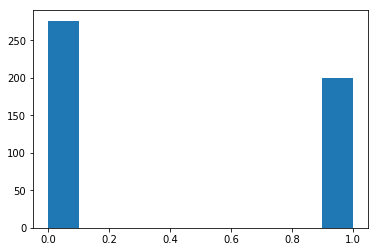

In [354]:
plt.hist(predictions)
plt.show()

In [355]:
xgbSolver.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

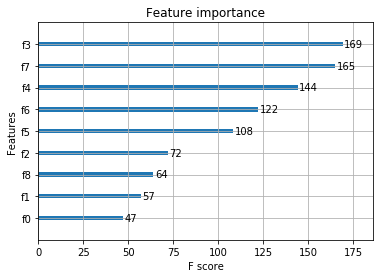

In [356]:
xgboost.plot_importance(xgbSolver)
plt.show()

In [344]:
features.head()

,ari0,ari1,ari2,ari3,homogeneity0,homogeneity1,homogeneity2,homogeneity3,sense_num,true
0,1.00000,0.000000,0.518250,0.005330,1.000000,7.894733e-16,0.430634,0.016203,4,False
1,0.00000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1,False
2,0.51825,0.000000,1.000000,0.026295,0.423047,8.863583e-16,1.000000,0.012899,3,True
3,0.00533,0.000000,0.026295,1.000000,0.020667,4.932189e-16,0.016748,1.000000,2,False
4,1.00000,0.334084,0.379895,0.116417,1.000000,3.019425e-01,0.350891,0.081715,4,False


# Checking

In [260]:
for d in dataset_list:
    tr = pd.read_csv(d+'train.csv', sep='\t')
    print(len(tr.word.unique()))

4
30
85


In [275]:
len(predictions)

119

In [303]:
predictions

array([0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 1, 2, 3, 2,
       3, 3, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 3, 0, 3, 3, 2, 3, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 3, 0, 1, 3, 2, 2, 1, 3, 1, 2, 2, 0, 2, 2,
       2, 2, 1, 0, 0, 3, 1, 2, 0, 3, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       0, 1, 2, 3, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0,
       1, 1, 0, 0, 3, 1, 3, 2, 3])

In [262]:
dataset_list

['../data/main/wiki-wiki/',
 '../data/main/bts-rnc/',
 '../data/main/active-dict/']

In [261]:
def check_dataset(dataset_folder, predicted_tags):
    DATASET = join(dataset_folder+'train.csv')
    
    
    contexts, main_words, labels, word_list_uniq = make_data(df_file_name=DATASET,\
                     use_gensim_simple_preproc=False, use_mystem=True,\
                     throw_main_word=False, tokenize=True)
    
    libru = pd.read_csv(join(dataset_folder, "train.csv_libru.csv"))
    bigText = pd.read_csv(join(dataset_folder,"train.csv_bigText.csv"))
    baseline = pd.read_csv(join(dataset_folder,"train.baseline-adagram.csv"), sep='\t')
    sensegram = pd.read_csv(join(dataset_folder,"train.csv_sensegram.csv"))
    
    datasets = [libru, bigText, baseline, sensegram]
    
    prediction = []

    for w, chosen in zip(word_list_uniq, predicted_tags):
        print("For word {} chosen {}".format(w, chosen))
        d = datasets[chosen] # датасет,из которого берем предсказания
        prediction.extend(d[d.word == w].predict_sense_id)
    print('-'*10)
    evaluate_weighted_ari(DATASET, prediction)

In [287]:
check_dataset('../data/main/wiki-wiki/', predictions[0:4])

For word замок chosen 0
For word лук chosen 1
For word суда chosen 2
For word бор chosen 2
----------
word	ari	count
бор	0.591175	56
замок	0.337541	138
лук	0.927898	110
суда	0.005465	135
	0.415702	439


In [288]:
check_dataset('../data/main/bts-rnc/', predictions[4:34])

For word балка chosen 2
For word вид chosen 2
For word винт chosen 2
For word горн chosen 2
For word губа chosen 2
For word жаба chosen 2
For word клетка chosen 2
For word крыло chosen 1
For word купюра chosen 3
For word курица chosen 2
For word лавка chosen 2
For word лайка chosen 3
For word лев chosen 2
For word лира chosen 1
For word мина chosen 1
For word мишень chosen 2
For word обед chosen 3
For word оклад chosen 2
For word опушка chosen 3
For word полис chosen 3
For word пост chosen 1
For word поток chosen 2
For word проказа chosen 0
For word пропасть chosen 2
For word проспект chosen 1
For word пытка chosen 2
For word рысь chosen 1
For word среда chosen 2
For word хвост chosen 2
For word штамп chosen 0
----------
word	ari	count
балка	0.219333	119
вид	0.174319	77
винт	0.278357	123
горн	0.148054	51
губа	0.011532	137
жаба	0.153284	121
клетка	0.253548	150
крыло	0.161214	91
купюра	-0.000079	150
курица	0.303684	93
лавка	0.275710	149
лайка	-0.007037	99
лев	0.227088	44
лира	0.763500	49

In [289]:
check_dataset('../data/main/active-dict/', predictions[34:])

For word дар chosen 2
For word двигатель chosen 0
For word двойник chosen 2
For word дворец chosen 3
For word девятка chosen 0
For word дедушка chosen 3
For word дежурная chosen 3
For word дежурный chosen 2
For word декабрист chosen 3
For word декрет chosen 1
For word дело chosen 2
For word демобилизация chosen 2
For word демократ chosen 1
For word демонстрация chosen 2
For word дерево chosen 2
For word держава chosen 2
For word дерзость chosen 1
For word десятка chosen 2
For word десяток chosen 3
For word деятель chosen 0
For word диалог chosen 1
For word диаметр chosen 3
For word диплом chosen 2
For word директор chosen 2
For word диск chosen 1
For word дичь chosen 3
For word длина chosen 1
For word доброволец chosen 2
For word добыча chosen 2
For word доказательство chosen 0
For word доктор chosen 2
For word долгота chosen 2
For word доля chosen 2
For word дом chosen 2
For word дорога chosen 1
For word достижение chosen 0
For word древесина chosen 0
For word дупло chosen 3
For word 

# 2 classes case

In [369]:
def check_dataset2(dataset_folder, predicted_tags):
    DATASET = join(dataset_folder+'train.csv')
    
    
    contexts, main_words, labels, word_list_uniq = make_data(df_file_name=DATASET,\
                     use_gensim_simple_preproc=False, use_mystem=True,\
                     throw_main_word=False, tokenize=True)
    
    libru = pd.read_csv(join(dataset_folder, "train.csv_libru.csv"))
    bigText = pd.read_csv(join(dataset_folder,"train.csv_bigText.csv"))
    baseline = pd.read_csv(join(dataset_folder,"train.baseline-adagram.csv"), sep='\t')
    sensegram = pd.read_csv(join(dataset_folder,"train.csv_sensegram.csv"))
    
    datasets = [libru, bigText, baseline, sensegram]
    
    prediction = []

    for w, variants in zip(word_list_uniq, np.split(predicted_tags, 4)):
        chosen = np.argmax(variants)
        print("For word {} chosen {}".format(w, chosen))
        d = datasets[chosen] # датасет,из которого берем предсказания
        prediction.extend(d[d.word == w].predict_sense_id)
    print('-'*10)
    evaluate_weighted_ari(DATASET, prediction)

In [370]:
check_dataset('../data/main/wiki-wiki/', predictions[0:4*4])

For word замок chosen 0
For word лук chosen 0
For word суда chosen 0
For word бор chosen 0
----------
word	ari	count
бор	0.171375	56
замок	0.337541	138
лук	0.357879	110
суда	-0.078850	135
	0.193393	439


# Submit

In [305]:
ls -lh ../data/main/wiki-wiki/

total 5,6M
-rw-r--r-- 1 fogside fogside 515K дек 20 11:53 test.csv
-rw-r--r-- 1 fogside fogside 520K янв 24 16:45 test.csv_baseline.csv
-rw-r--r-- 1 fogside fogside 520K янв 24 16:44 test.csv_bigText.csv
-rw-r--r-- 1 fogside fogside 520K янв 24 16:43 test.csv_libru.csv
-rw-r--r-- 1 fogside fogside 348K ноя  7 15:48 train.baseline-adagram.csv
-rw-r--r-- 1 fogside fogside 350K ноя 21 16:40 train.constant.csv
-rw-r--r-- 1 fogside fogside 358K янв 13 20:52 train.csv
-rw-r--r-- 1 fogside fogside 361K янв 22 17:08 train.csv_bigText.csv
-rw-r--r-- 1 fogside fogside 361K янв 22 17:01 train.csv_libru.csv
-rw-r--r-- 1 fogside fogside 364K янв 22 17:25 train.csv_sensegram.csv
-rw-r--r-- 1 fogside fogside 350K ноя 21 16:40 train.oracle.csv
-rw-r--r-- 1 fogside fogside 350K ноя 21 16:40 train.random-1-3.csv
-rw-r--r-- 1 fogside fogside 350K ноя 21 16:40 train.random-1-6.csv
-rw-r--r-- 1 fogside fogside 350K ноя 21 16:40 train.unique-dataset-wise.csv


In [322]:
from testing_interface import save_predictions

In [323]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [324]:
def save_prediction(dataset_folder):
    DATASET = join(dataset_folder+'test.csv')
    
    
    contexts, main_words, labels, word_list_uniq = make_data(df_file_name=DATASET,\
                     use_gensim_simple_preproc=False, use_mystem=True,\
                     throw_main_word=False, tokenize=True)
    
    libru = pd.read_csv(join(dataset_folder, "test.csv_libru.csv"))
    bigText = pd.read_csv(join(dataset_folder,"test.csv_bigText.csv"))
    baseline = pd.read_csv(join(dataset_folder,"test.csv_baseline.csv"))
#     sensegram = pd.read_csv(join(dataset_folder,"test.csv_sensegram.csv"))
    
    datasets = [libru, bigText, baseline, sensegram]
    
    prediction = []

    for w in word_list_uniq:
        clust_num = []
        for df in datasets:
            n = len(set(df[df.word == w].predict_sense_id.values))
            clust_num.append(n)
        chosen = np.argmax(clust_num)
        print("For word {} chosen {}".format(w, chosen))
        d = datasets[chosen] # датасет,из которого берем предсказания
        prediction.extend(d[d.word == w].predict_sense_id)
    
    save_predictions(DATASET, predictions=prediction, df_saving_name="final")

In [325]:
save_prediction("../data/main/wiki-wiki/")

For word банка chosen 2
For word белка chosen 2
For word бит chosen 0
For word горе chosen 0
For word гранат chosen 1
For word граф chosen 0
For word душ chosen 1
Saved!
